In [10]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 99% 809M/814M [00:09<00:00, 162MB/s]
100% 814M/814M [00:09<00:00, 91.5MB/s]


In [13]:
!unzip -q dogs-vs-cats-redux-kernels-edition.zip -d .

In [14]:
!unzip -q train.zip -d .

In [15]:
import os
print( len(os.listdir('/content/train/')))

25000


In [17]:
import os
import shutil

for i in os.listdir('/content/train/'):
  if 'cat' in i:
    shutil.copyfile('/content/train/'+ i,'/content/dataset/cat/'+i )
  if 'dog' in i:
    shutil.copyfile('/content/train/'+ i,'/content/dataset/dog/'+i )


In [27]:
import tensorflow as tf
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/dataset/',
    image_size=(64,64),
    batch_size=64,
    subset='training',
    validation_split=0.2,
    seed=1234
)
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/dataset/',
    image_size=(64,64),
    batch_size=64,
    subset='validation',
    validation_split=0.2,
    seed=1234
)

print(train_ds)

# 압축
def 전처리함수(i, 정답):
  i = tf.cast(i / 255.0, tf.float32)
  return i, 정답
train_ds = train_ds.map(전처리함수)
valid_ds = valid_ds.map(전처리함수)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


tf.Tensor(
[[[[0.08425054 0.02934857 0.02542701]
   [0.0788603  0.02395833 0.02003676]
   [0.09209559 0.04895834 0.03327206]
   ...
   [0.06710516 0.02360026 0.00803654]
   [0.07450981 0.01960784 0.01568628]
   [0.00392923 0.00803654 0.00392923]]

  [[0.1010972  0.0501168  0.02658739]
   [0.119267   0.06828661 0.0447572 ]
   [0.06590265 0.03845167 0.01492226]
   ...
   [0.07071079 0.02720588 0.01164216]
   [0.06977443 0.01487247 0.0109509 ]
   [0.00349839 0.01146408 0.00509153]]

  [[0.09571078 0.04473039 0.01335784]
   [0.09761029 0.0466299  0.01525735]
   [0.07900965 0.066142   0.03922909]
   ...
   [0.07178692 0.02703546 0.01188726]
   [0.0753753  0.02147863 0.01722197]
   [0.00857843 0.01602137 0.00982307]]

  ...

  [[0.3947572  0.32857114 0.24108073]
   [0.46586245 0.3835095  0.26279873]
   [0.5416322  0.4666322  0.34874004]
   ...
   [0.46569967 0.29682714 0.0887389 ]
   [0.37026656 0.20948224 0.0077742 ]
   [0.4407437  0.29987362 0.05557215]]

  [[0.48482114 0.40479666 0.296574

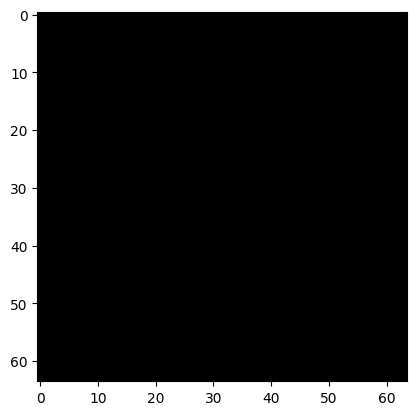

In [28]:
import matplotlib.pyplot as plt
for i, 정답 in train_ds.take(1):
  print(i)
  print(정답)
  plt.imshow(i[0].numpy().astype('uint8')) # 텐서를 넘파이어레이로 변환
  plt.show()

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding="same", activation="relu", input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(32,(3,3),padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Dropout(0.2), # 노드둘 중에 20% 제거해주세요 (과적합방지)

    tf.keras.layers.Conv2D(32,(3,3),padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") # 이진분류 문제이므로 마지막 노드갯수는 1 (확률)
])

# 학습 중간에 저장하고 싶다면(다음날 마저 돌리고싶어서)
콜백함수 = tf.keras.callbacks.ModelCheckpoint(
    filepath = '체크포인트/mnist',
    monitor='val_acc',
    mode='max',
    save_weights_only=True,
    save_freq='epoch'
)

model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(train_ds, validation_data=(valid_ds), epochs=3, callbacks=[콜백함수])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281,793 (1.07 MB)

 Trainable params: 281,793 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 194s 611ms/step - accuracy: 0.5271 - loss: 0.7076 - val_accuracy: 0.6826 - val_loss: 0.5978
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 174s 555ms/step - accuracy: 0.6980 - loss: 0.5824 - val_accuracy: 0.7440 - val_loss: 0.5193
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 549ms/step - accuracy: 0.7373 - loss: 0.5319 - val_accuracy: 0.7404 - val_loss: 0.5174
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 188s 599ms/step - accuracy: 0.7687 - loss: 0.4834 - val_accuracy: 0.8014 - val_loss: 0.4350
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 180s 527ms/step - accuracy: 0.7949 - loss: 0.4384 - val_accuracy: 0.8006 - val_loss: 0.4251


In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 845,381 (3.22 MB)

 Trainable params: 281,793 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 563,588 (2.15 MB)

In [44]:
# 학습 완료된 모델 저장(레이어 설정, loss함수종류, optimizer종류, 훈련 후의 가중치인 w값)
# 1. 모델 전체 저장(레이서 순서, 어떤 로스 등등)
model.save('새폴더/model1.keras')

In [45]:
# # 2. 불러오기

불러온모델 = tf.keras.models.load_model('새폴더/model1.keras')
불러온모델.summary()




Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 845,381 (3.22 MB)

 Trainable params: 281,793 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 563,588 (2.15 MB)

In [46]:
불러온모델.evaluate(valid_ds)

79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - accuracy: 0.7984 - loss: 0.4211


[0.4250504970550537, 0.800599992275238]

In [ ]:
# 3. 간단하게 w값만 저장하고 싶다면

## 새로 모델 생성
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding="same", activation="relu", input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(32,(3,3),padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Dropout(0.2), # 노드둘 중에 20% 제거해주세요 (과적합방지)

    tf.keras.layers.Conv2D(32,(3,3),padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") # 이진분류 문제이므로 마지막 노드갯수는 1 (확률)
])

model2.summary()

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 불러오기
model2.load_weights('체크포인트/mnist')
model2.evaluate(valid_ds)